In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 


import pandasql as psql

In [47]:
Data1 = pd.read_csv(r"C:\Users\rakes\Downloads\archive (2)\Loan_Data.csv", header=0)
data_bk=Data1.copy()
Data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
Data1.shape


(614, 13)

In [51]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
Data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [59]:
Data1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
Data = Data1.dropna()

In [63]:
Data.duplicated().sum()


0

In [65]:
Data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
Data1.drop_duplicates(inplace=True)

# Visualizing Data Distribution


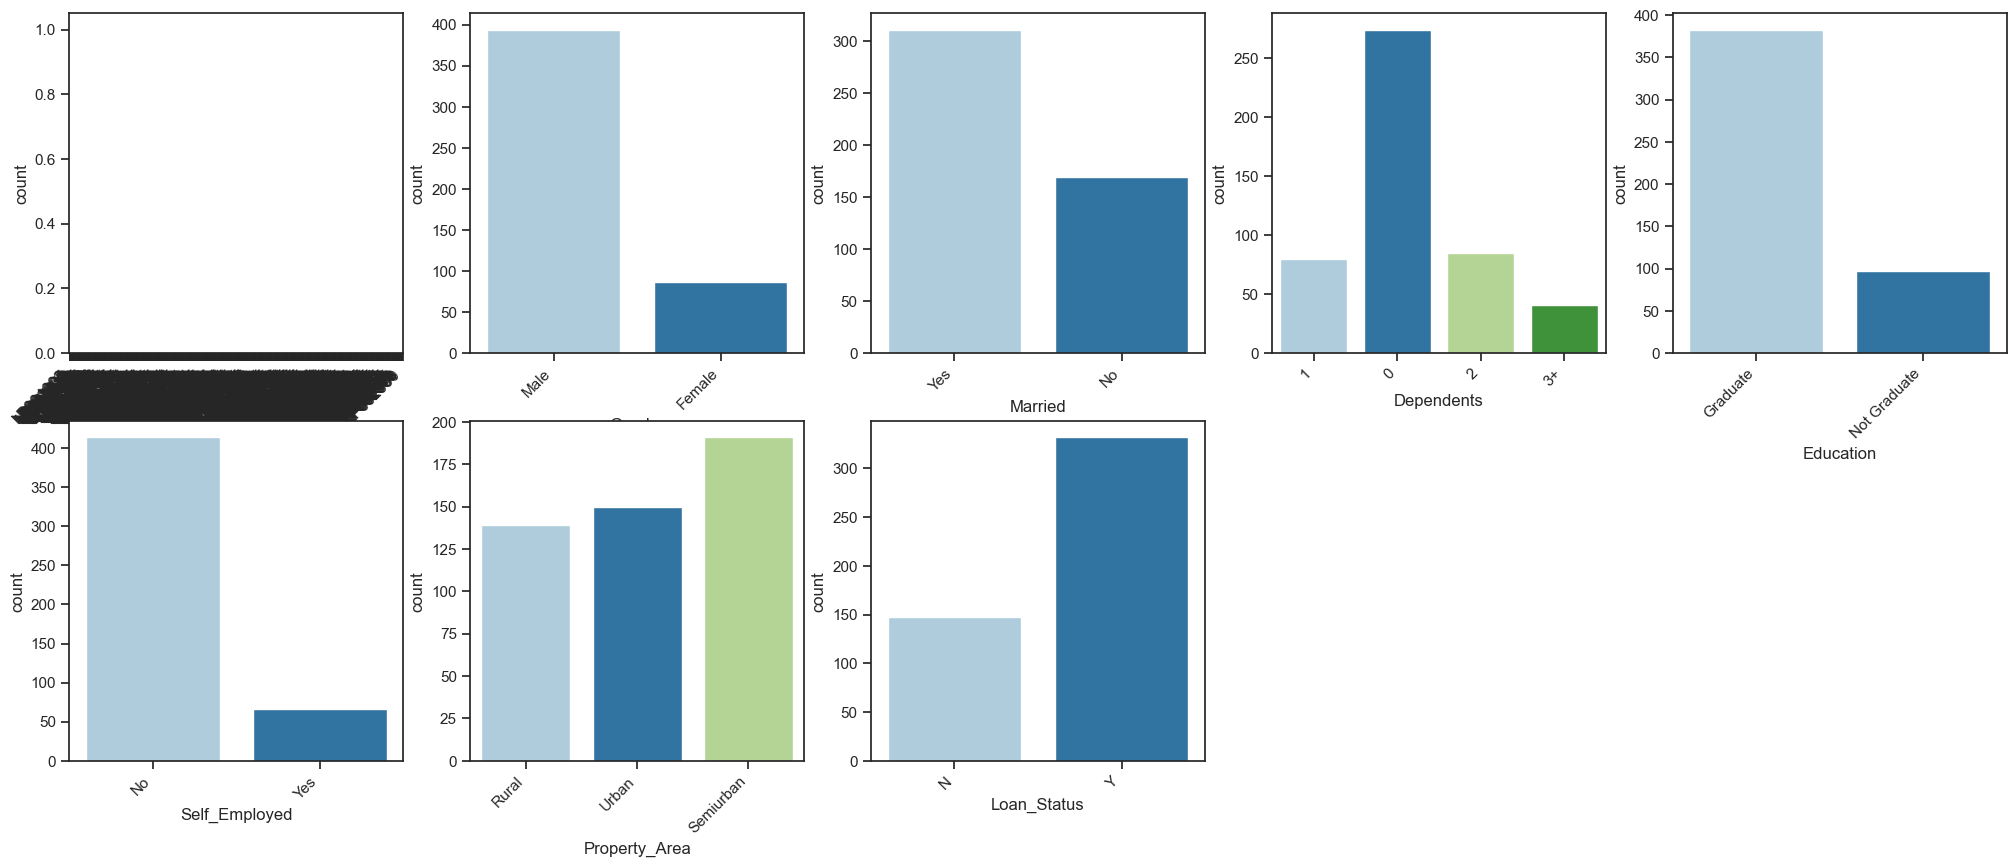

In [70]:
#Visualizing Data Distribution
categorical_features = Data.select_dtypes(include=[object])

plt.figure(figsize = (25,15))
for i, feature in enumerate(categorical_features):
      plt.subplot(3,5,i + 1)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = Data)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

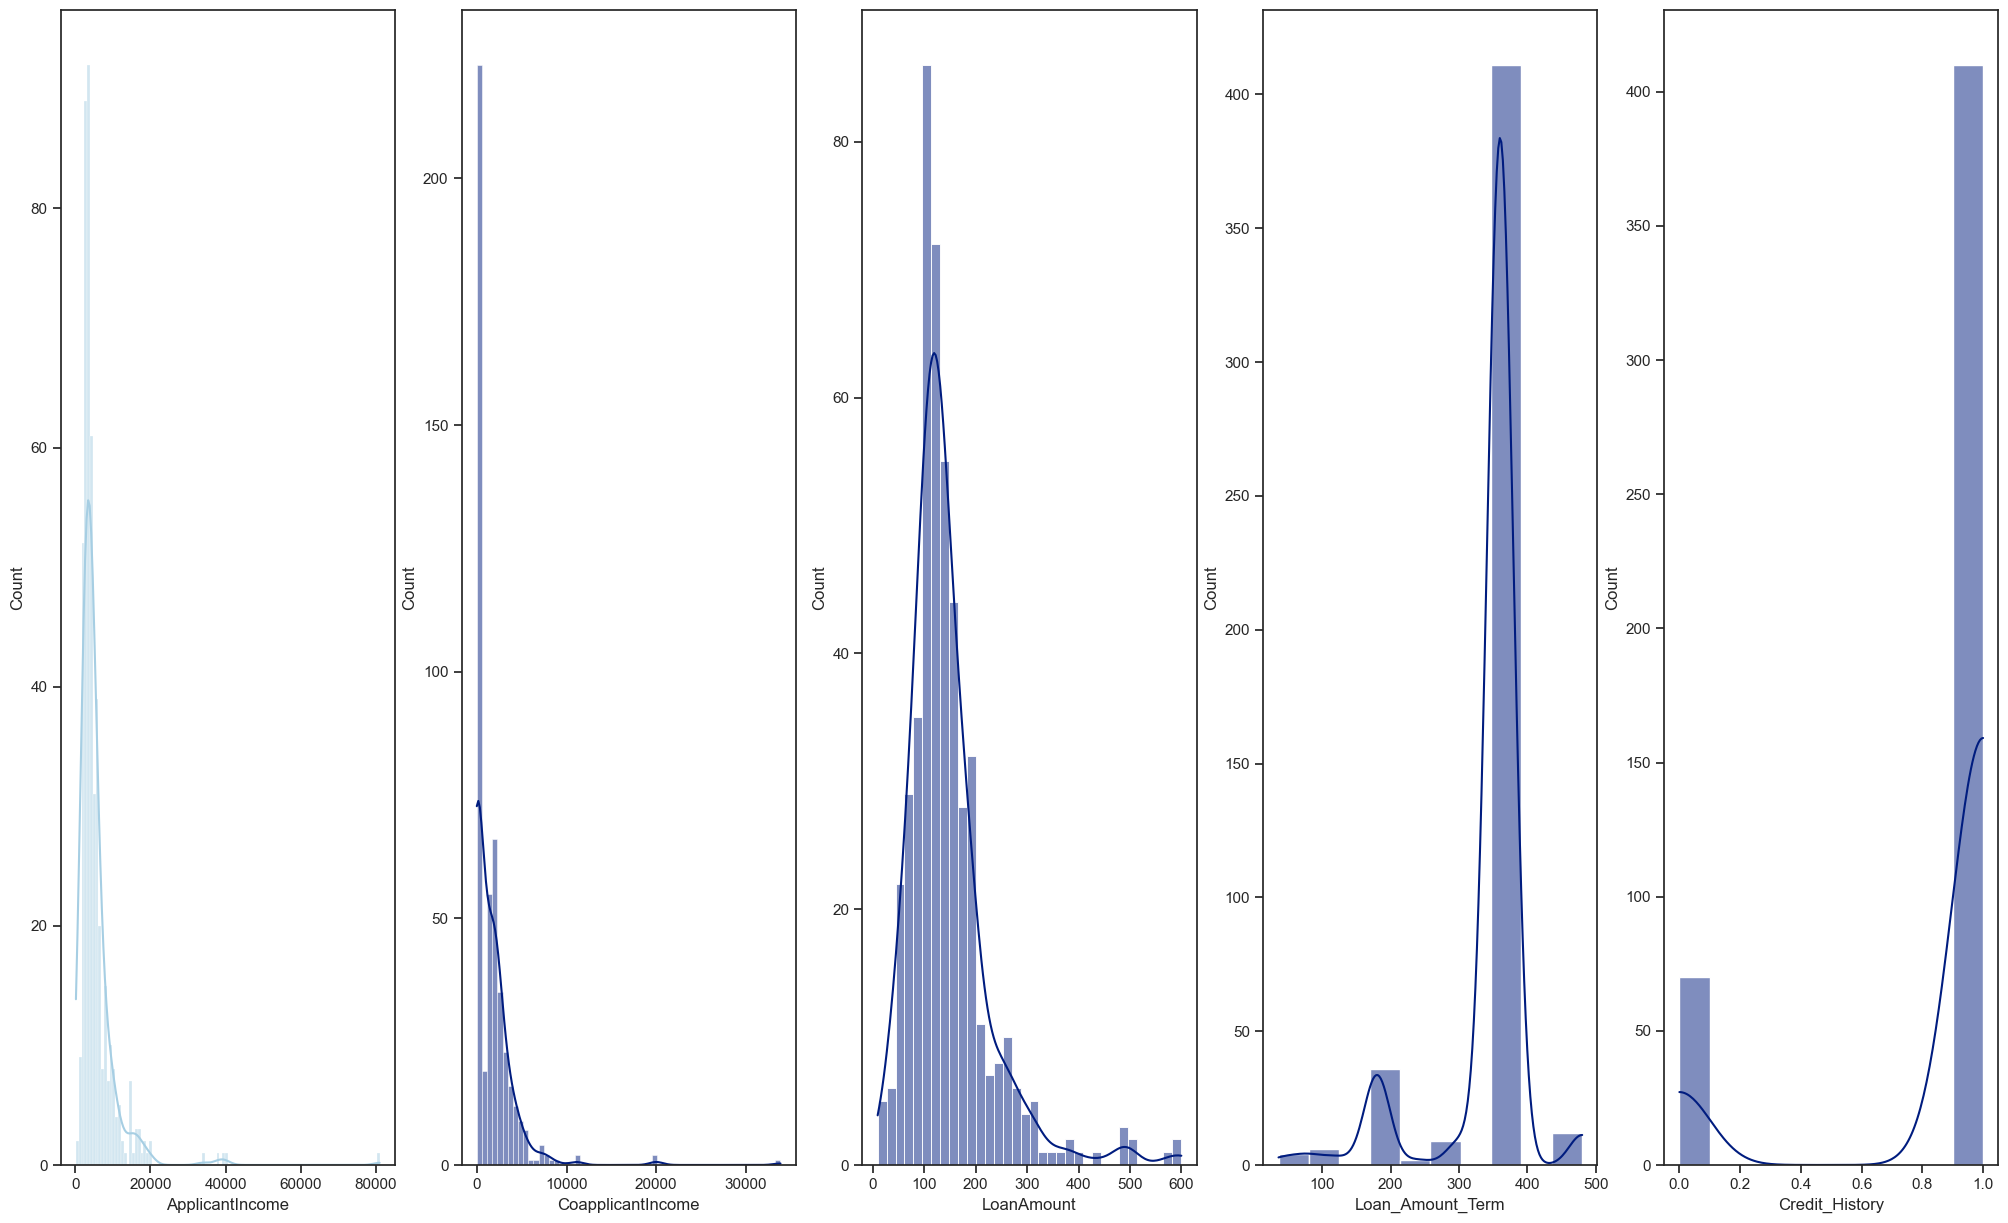

In [71]:
numeric_features = Data.select_dtypes(include=[np.number])

plt.figure(figsize = (25,15))
for i, feature in enumerate(numeric_features.columns):
    plt.subplot(1,5,i + 1)
    sns.set(palette='dark')
    sns.set_style("ticks")
    sns.histplot(Data[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

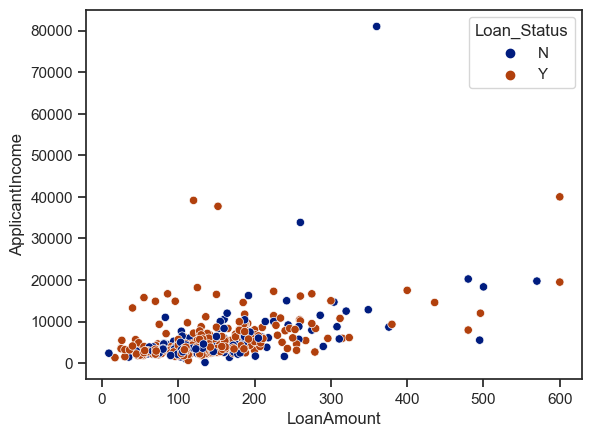

In [74]:
sns.scatterplot(data=Data, x=Data.LoanAmount, y=Data.ApplicantIncome, hue=Data.Loan_Status)

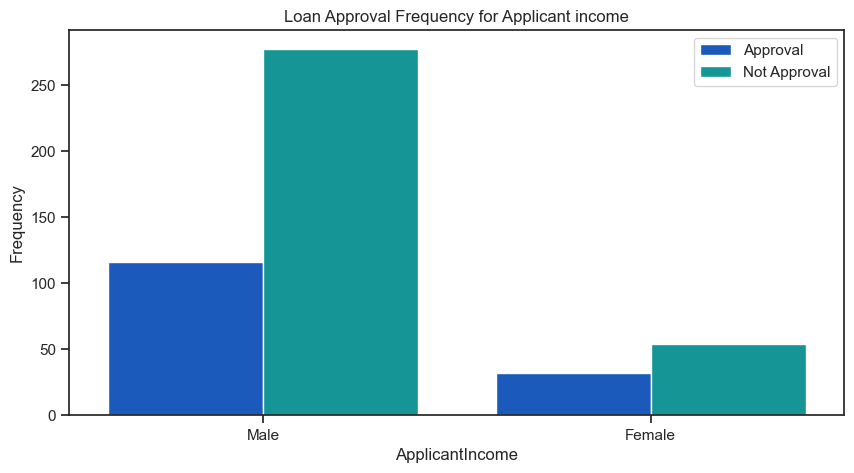

In [78]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = Data['Gender'], data=Data, hue='Loan_Status',palette="winter")
plt.title('Loan Approval Frequency for Applicant income')
plt.xlabel('ApplicantIncome')
plt.legend(["Approval", "Not Approval"])
plt.ylabel('Frequency')
plt.show()

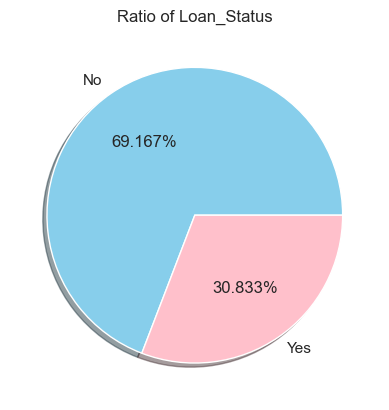

In [80]:
plt.pie(x = Data['Loan_Status'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'pink'], shadow=True)
plt.title('Ratio of Loan_Status')
plt.show()


In [86]:
Data.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [88]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
categorical_columns =['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

for column in categorical_columns:
    Data[column] = label_encoder.fit_transform(Data[column])

# Convert the DataFrame to int64
Data = Data.astype('int64')

# Display the converted DataFrame
print(Data)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1          0       1        1           1          0              0   
2          1       1        1           0          0              1   
3          2       1        1           0          1              0   
4          3       1        0           0          0              0   
5          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
609      475       0        0           0          0              0   
610      476       1        1           3          0              0   
611      477       1        1           1          0              0   
612      478       1        1           2          0              0   
613      479       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1                247                 50          76                 7   
2

(13.5, -0.5)

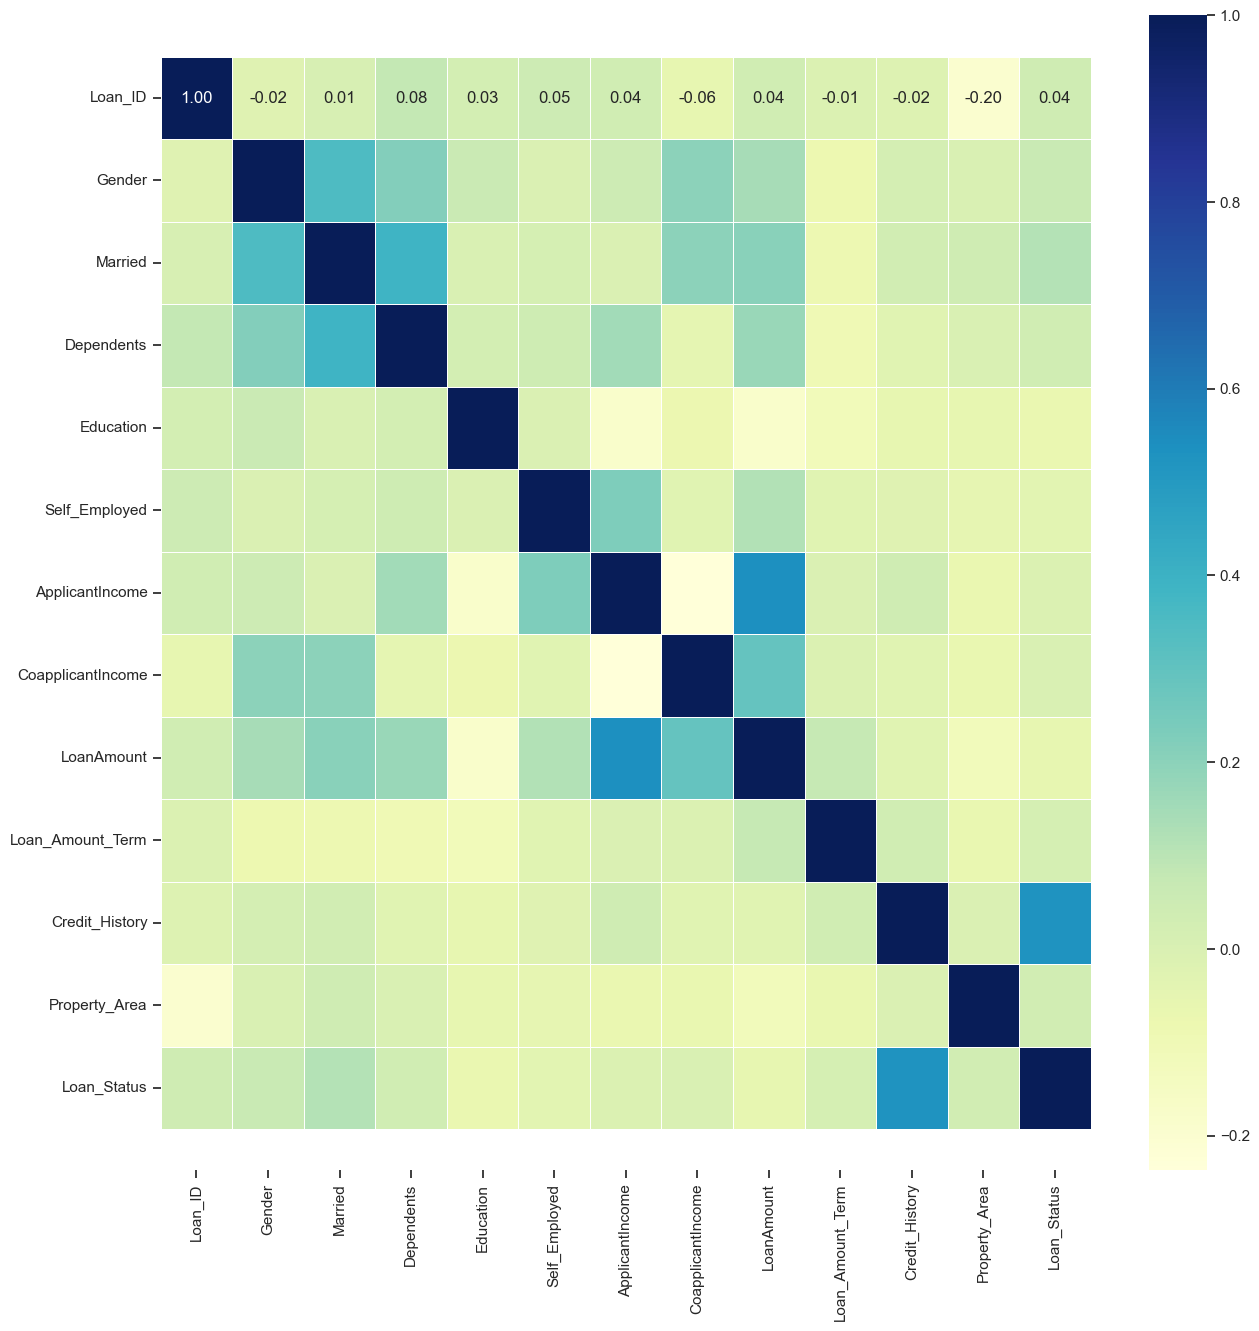

In [90]:
corr_matrix = Data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [92]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,247,50,76,7,1,0,0
2,1,1,1,0,0,1,112,0,23,7,1,2,1
3,2,1,1,0,1,0,74,135,68,7,1,2,1
4,3,1,0,0,0,0,305,0,89,7,1,2,1
5,4,1,1,2,0,1,281,196,159,7,1,2,1


In [96]:
Data['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [98]:
x = Data.drop('Loan_Status',axis=1)
y= Data[['Loan_Status']]

In [100]:
# Split the data into Train and Test(random samping)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Display shape for train and test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((336, 12), (144, 12), (336, 1), (144, 1))

In [102]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
#x_train[cols]=mmscaler.fit_transform(x_train[cols])

x_train=pd.DataFrame(x_train)

x_test=mmscaler.fit_transform(x_test)
#x_test[cols]=mmscaler.fit_transform(x_test[cols])

x_test=pd.DataFrame(x_test)

In [104]:
EMResults1 = pd.read_csv(r"C:\Users\rakes\Downloads\EMResults (1).csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[100   0]
 [ 29  15]]
Outcome values : 
 100 0 29 15
Classification report : 
               precision    recall  f1-score   support

           1       0.78      1.00      0.87       100
           0       1.00      0.34      0.51        44

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

Accuracy : 79.9 %
Precision : 77.5 %
Recall : 100.0 %
F1 Score : 0.873
Specificity or True Negative Rate : 34.1 %
Balanced Accuracy : 67.0 %
MCC : 0.514
roc_auc_score: 0.67


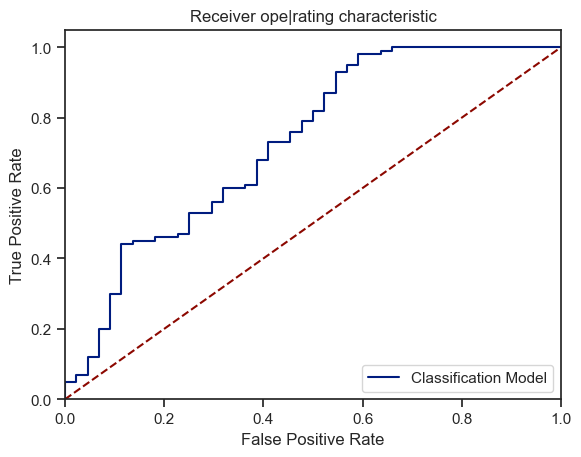

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[84 16]
 [22 22]]
Outcome values : 
 84 16 22 22
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.84      0.82       100
           0       0.58      0.50      0.54        44

    accuracy                           0.74       144
   macro avg       0.69      0.67      0.68       144
weighted avg       0.73      0.74      0.73       144

Accuracy : 73.6 %
Precision : 79.2 %
Recall : 84.0 %
F1 Score : 0.816
Specificity or True Negative Rate : 50.0 %
Balanced Accuracy : 67.0 %
MCC : 0.355
roc_auc_score: 0.67


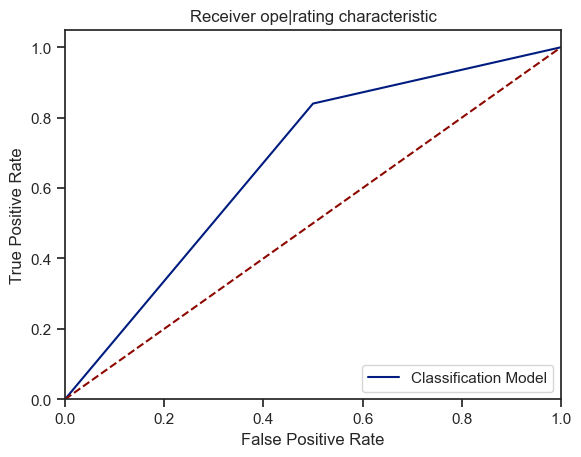

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[96  4]
 [27 17]]
Outcome values : 
 96 4 27 17
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.96      0.86       100
           0       0.81      0.39      0.52        44

    accuracy                           0.78       144
   macro avg       0.80      0.67      0.69       144
weighted avg       0.79      0.78      0.76       144

Accuracy : 78.5 %
Precision : 78.0 %
Recall : 96.0 %
F1 Score : 0.861
Specificity or True Negative Rate : 38.6 %
Balanced Accuracy : 67.3 %
MCC : 0.452
roc_auc_score: 0.673


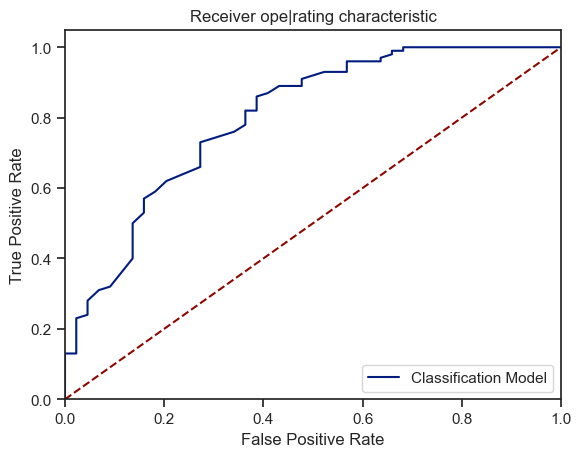

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[98  2]
 [26 18]]
Outcome values : 
 98 2 26 18
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.98      0.87       100
           0       0.90      0.41      0.56        44

    accuracy                           0.81       144
   macro avg       0.85      0.69      0.72       144
weighted avg       0.82      0.81      0.78       144

Accuracy : 80.6 %
Precision : 79.0 %
Recall : 98.0 %
F1 Score : 0.875
Specificity or True Negative Rate : 40.9 %
Balanced Accuracy : 69.4 %
MCC : 0.518
roc_auc_score: 0.695


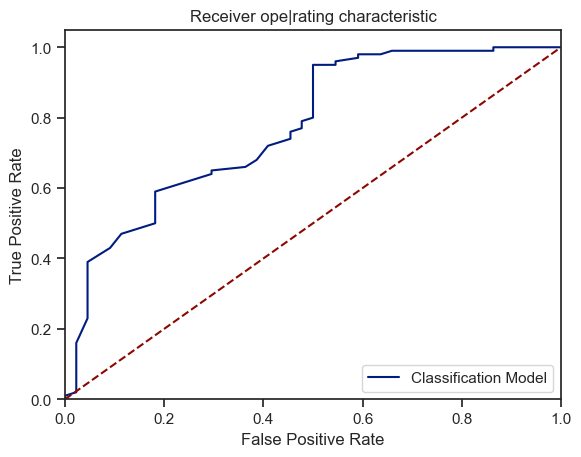

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[100   0]
 [ 32  12]]
Outcome values : 
 100 0 32 12
Classification report : 
               precision    recall  f1-score   support

           1       0.76      1.00      0.86       100
           0       1.00      0.27      0.43        44

    accuracy                           0.78       144
   macro avg       0.88      0.64      0.65       144
weighted avg       0.83      0.78      0.73       144

Accuracy : 77.8 %
Precision : 75.8 %
Recall : 100.0 %
F1 Score : 0.862
Specificity or True Negative Rate : 27.3 %
Balanced Accuracy : 63.7 %
MCC : 0.455
roc_auc_score: 0.636


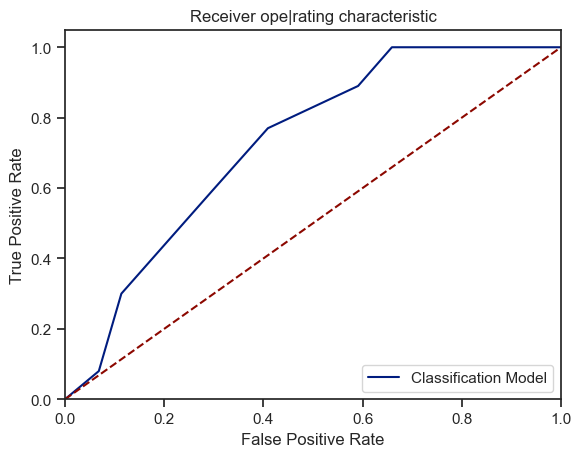

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[100   0]
 [ 29  15]]
Outcome values : 
 100 0 29 15
Classification report : 
               precision    recall  f1-score   support

           1       0.78      1.00      0.87       100
           0       1.00      0.34      0.51        44

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

Accuracy : 79.9 %
Precision : 77.5 %
Recall : 100.0 %
F1 Score : 0.873
Specificity or True Negative Rate : 34.1 %
Balanced Accuracy : 67.0 %
MCC : 0.514
roc_auc_score: 0.67


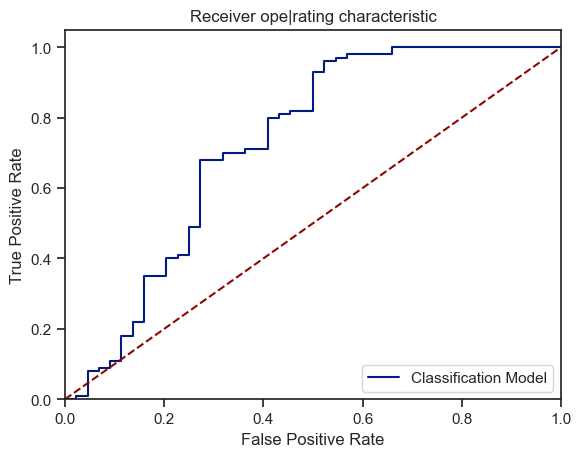

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[99  1]
 [28 16]]
Outcome values : 
 99 1 28 16
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.99      0.87       100
           0       0.94      0.36      0.52        44

    accuracy                           0.80       144
   macro avg       0.86      0.68      0.70       144
weighted avg       0.83      0.80      0.77       144

Accuracy : 79.9 %
Precision : 78.0 %
Recall : 99.0 %
F1 Score : 0.872
Specificity or True Negative Rate : 36.4 %
Balanced Accuracy : 67.7 %
MCC : 0.505
roc_auc_score: 0.677


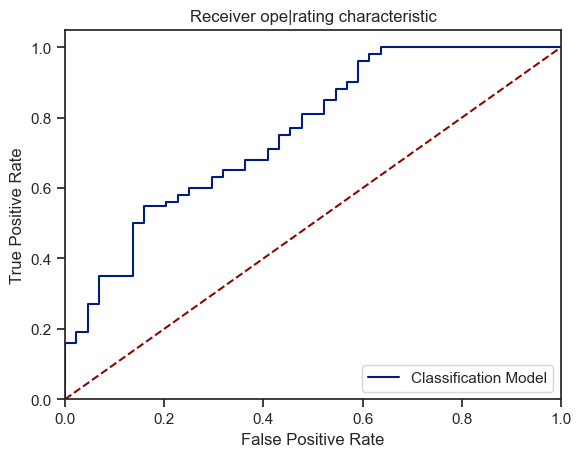

-----------------------------------------------------------------------------------------------------


In [110]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelSVM = SVC(kernel='poly', degree=2, probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver ope|rating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    #EMResults1 = EMResults1.append(new_row, ignore_index=True)
    EMResults1= pd.concat([EMResults1, pd.DataFrame([new_row])], ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [112]:
EMResults1.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),100,0,29,15,0.799,0.775,1.00,0.873,0.341,0.514,0.670455,0.670
1,DecisionTreeClassifier(),84,16,22,22,0.736,0.792,0.84,0.816,0.500,0.355,0.670000,0.670
2,"(DecisionTreeClassifier(max_features='sqrt', r...",96,4,27,17,0.785,0.780,0.96,0.861,0.386,0.452,0.673182,0.673
3,"(ExtraTreeClassifier(random_state=1193048492),...",98,2,26,18,0.806,0.790,0.98,0.875,0.409,0.518,0.694545,0.694
4,KNeighborsClassifier(n_neighbors=20),100,0,32,12,0.778,0.758,1.00,0.862,0.273,0.455,0.636364,0.637
5,"SVC(degree=2, kernel='poly', probability=True)",100,0,29,15,0.799,0.775,1.00,0.873,0.341,0.514,0.670455,0.670
6,GaussianNB(),99,1,28,16,0.799,0.780,0.99,0.872,0.364,0.505,0.676818,0.677


In [114]:
y_predRF=ModelSVM.predict(x_test)

In [116]:
Results = pd.DataFrame({'Loan_Status_P':y_predRF})
ResultsFinal=data_bk.merge(Results,left_index=True,right_index=True)
ResultsFinal.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_P
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N,1
101,LP001349,Male,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semiurban,Y,1
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N,1
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,1
136,LP001489,Female,Yes,0,Graduate,No,4583,0.0,84.0,360.0,1.0,Rural,N,1
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y,1
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y,1
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,1
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y,1
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y,1
